In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

# Q4

In [3]:
#looking at top 5 rows of my df
gdp_df.head()


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


# answer: Example(this is how you want to show the answer)

# Q5

In [5]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


In [6]:
gdp_df.shape

(7662, 4)

# answer: (7662 rows, 4 columns), dtypes: float64(2), int64(1), object(1)

# Q6

In [7]:
gdpdf = gdp_df.drop(columns='Value Footnotes')

In [8]:
gdpdf_renamed = gdpdf.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'GDP_Per_Capita'})

In [9]:
gdpdf_renamed

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


# answer above

# Q7

In [10]:
gdpdf_renamed.groupby('Year').size()

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
2021    241
2022    232
dtype: int64

In [11]:
gdpdf_renamed.groupby('Country')['Year'].count()

Country
Afghanistan                    20
Africa Eastern and Southern    33
Africa Western and Central     33
Albania                        33
Algeria                        33
                               ..
Viet Nam                       33
West Bank and Gaza             29
World                          33
Zambia                         33
Zimbabwe                       33
Name: Year, Length: 242, dtype: int64

In [12]:
gdpdf_at33years = gdpdf_renamed.groupby('Country')['Year'].count() == 33

In [13]:
gdpdf_at33years[gdpdf_at33years]

Country
Africa Eastern and Southern    True
Africa Western and Central     True
Albania                        True
Algeria                        True
Angola                         True
                               ... 
Vanuatu                        True
Viet Nam                       True
World                          True
Zambia                         True
Zimbabwe                       True
Name: Year, Length: 202, dtype: bool

In [14]:
gdpdf_at33years[gdpdf_at33years].count()

202

# answer: there's 202 countries that have data for All 33 years!

In [15]:
gdpdf_under33years = gdpdf_renamed.groupby('Country')['Year'].count() != 33

In [16]:
gdpdf_under33years[gdpdf_under33years]

Country
Afghanistan                  True
Aruba                        True
Bhutan                       True
Bosnia and Herzegovina       True
Cambodia                     True
Cayman Islands               True
Croatia                      True
CuraÃ§ao                     True
Djibouti                     True
Estonia                      True
Hungary                      True
Iceland                      True
Israel                       True
Kosovo                       True
Kuwait                       True
Latvia                       True
Lebanon                      True
Liberia                      True
Libya                        True
Lithuania                    True
Maldives                     True
Moldova                      True
Montenegro                   True
Nauru                        True
Other small states           True
Palau                        True
Qatar                        True
San Marino                   True
Serbia                       True
Sint M

In [17]:
gdpdf_under33years[gdpdf_under33years].count()

40

# answer: there's 40 countries that are missing at least 1 or more years of data

# answer: i notice that some of the date missing was due to incidents such as war

# Q8

In [18]:
gdpdf_2020 = gdpdf_renamed[gdpdf_renamed.Year == 2020]

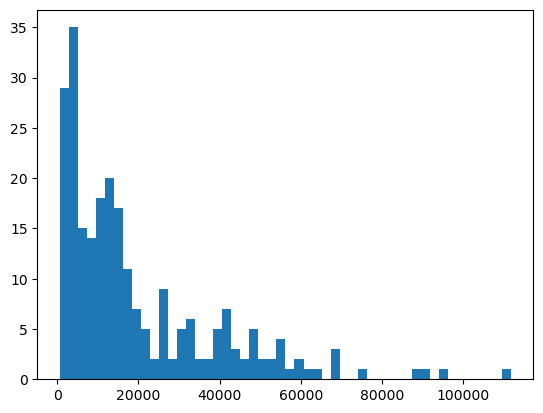

In [19]:
plt.hist(gdpdf_2020['GDP_Per_Capita'], bins = 50);

C:\Users\berat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

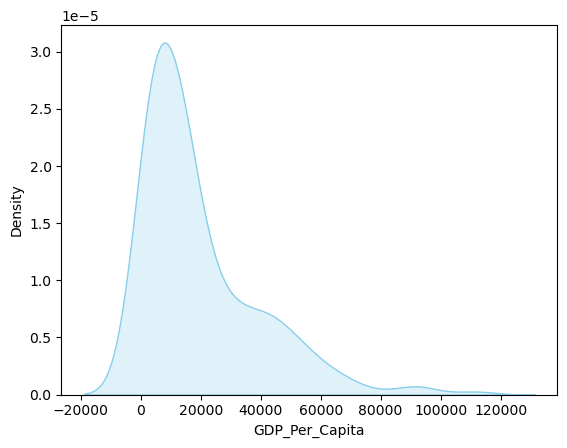

In [20]:
sns.kdeplot(gdpdf_2020['GDP_Per_Capita'], color = 'skyblue', fill = True)

<Axes: >

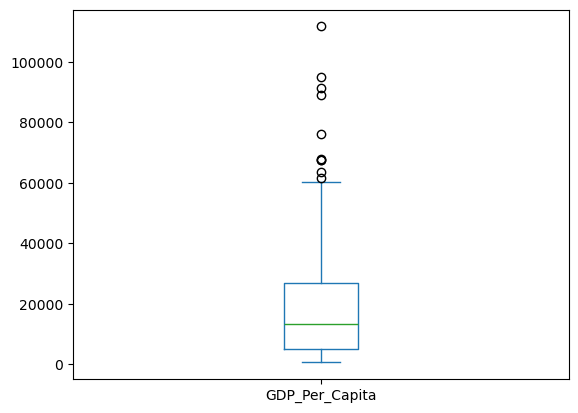

In [21]:
gdpdf_2020['GDP_Per_Capita'].plot(kind = 'box')

<Axes: xlabel='GDP_Per_Capita'>

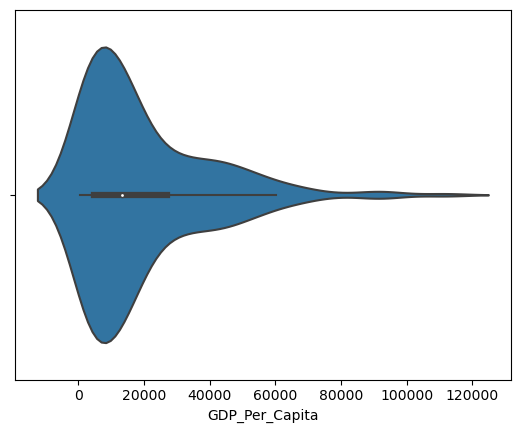

In [22]:
sns.violinplot(x = gdpdf_2020['GDP_Per_Capita'])

# answer: I notice that the histogram and density plot scale best in 

# Q9

In [23]:
gdpdf_2020['GDP_Per_Capita'].median()

13357.997571928625

# ANSWER ABOVE

# Q10

In [24]:
gdp_decades = gdpdf_renamed[gdpdf_renamed['Year'].isin([1990, 2000, 2010, 2020])]

In [25]:
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


<Axes: >

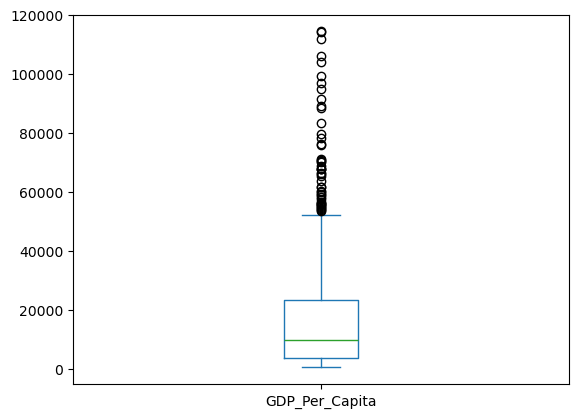

In [26]:
gdp_decades['GDP_Per_Capita'].plot(kind = 'box')

<Axes: xlabel='GDP_Per_Capita', ylabel='Year'>

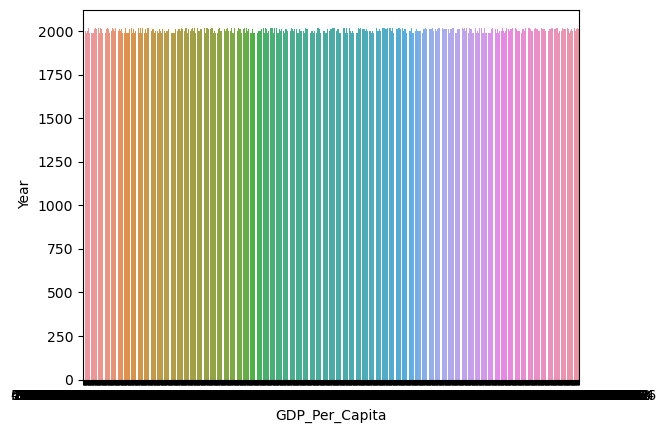

In [27]:
sns.barplot(
    x = gdp_decades['GDP_Per_Capita'],
    y = gdp_decades['Year'])

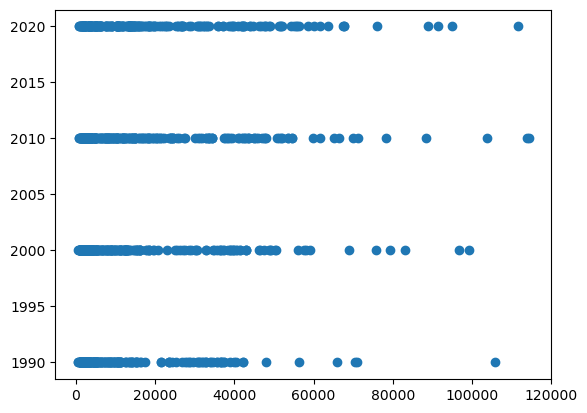

In [28]:
plt.scatter(gdp_decades['GDP_Per_Capita'], gdp_decades['Year'])

# ANSWER: ?

# Q11

In [29]:
gdpdf_renamed[gdpdf_renamed['GDP_Per_Capita'] > 100000].sort_values('Year', ascending = True)

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098
4165,Luxembourg,2003,104743.000088
4164,Luxembourg,2004,107634.837198
4163,Luxembourg,2005,108632.360016
4162,Luxembourg,2006,113346.035782
4161,Luxembourg,2007,120647.822959


# answer: United Arab Emirates

#  Q 12

In [30]:
gdpdf_renamed[gdpdf_renamed['Year'] == 2020].sort_values('GDP_Per_Capita', ascending = False)

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751
6108,Singapore,2020,94910.101431
3279,Ireland,2020,91356.855054
5746,Qatar,2020,89019.069860
681,Bermuda,2020,76117.804744
...,...,...,...
5074,Niger,2020,1214.546556
6273,Somalia,2020,1127.418534
1630,Dem. Rep. Congo,2020,1044.071214
1217,Central African Republic,2020,847.765012


# answer: Luxembourg

# Q 13

In [31]:
gdpdf_renamed[gdpdf_renamed['Year'] == 2020].sort_values('GDP_Per_Capita', ascending = True)

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263
1217,Central African Republic,2020,847.765012
1630,Dem. Rep. Congo,2020,1044.071214
6273,Somalia,2020,1127.418534
5074,Niger,2020,1214.546556
...,...,...,...
681,Bermuda,2020,76117.804744
5746,Qatar,2020,89019.069860
3279,Ireland,2020,91356.855054
6108,Singapore,2020,94910.101431


In [32]:
gdpdf_renamed[gdpdf_renamed['Year'] == 2020]['GDP_Per_Capita'].min()

711.3552634

In [33]:
gdpdf_burundi = gdpdf_renamed[gdpdf_renamed['Country'] == 'Burundi'].sort_values('Year', ascending = True)

In [34]:
gdpdf_burundi

,Country,Year,GDP_Per_Capita
1003,Burundi,1990,1175.155086
1002,Burundi,1991,1209.388158
1001,Burundi,1992,1190.067435
1000,Burundi,1993,1153.541309
999,Burundi,1994,1103.167298
998,Burundi,1995,956.490976
997,Burundi,1996,880.309412
996,Burundi,1997,867.284265
995,Burundi,1998,891.699844
994,Burundi,1999,862.006680


Text(0.5, 1.0, 'Burundi')

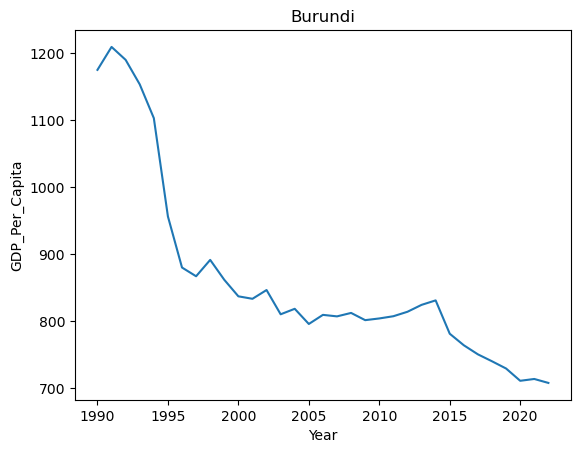

In [35]:
plt.plot(gdpdf_burundi['Year'], gdpdf_burundi['GDP_Per_Capita'])
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')
plt.title('Burundi')

# answer: burundi had the lowest GDP in 2020

# Q13 bonus question: if you choose to attempt

# answer: if you choose to attempt

# Q 14

In [36]:
internet_df = pd.read_csv('../data/internet_use.csv')

In [37]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes,footnoteSeqID,Footnote
0,Afghanistan,2014,6.390000,NaN,1.0,Population age 5+. Census.
1,Afghanistan,2013,5.900000,NaN,2.0,Population aged 10+. Estimated based on survey...
2,Afghanistan,2012,5.454545,NaN,3.0,All population.
3,Afghanistan,2011,5.000000,NaN,4.0,Individuals aged 15 years and over
4,Afghanistan,2010,4.000000,NaN,5.0,Individuals aged 15 years and over


In [38]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes,footnoteSeqID,Footnote
4490,Zimbabwe,1997,0.033080,NaN,NaN,NaN
4491,Zimbabwe,1996,0.016790,NaN,NaN,NaN
4492,Zimbabwe,1995,0.007684,NaN,NaN,NaN
4493,Zimbabwe,1994,0.001739,NaN,NaN,NaN
4494,Zimbabwe,1990,0.000000,NaN,NaN,NaN


In [39]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
 4   footnoteSeqID    180 non-null    float64
 5   Footnote         180 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 210.8+ KB


In [40]:
internet_df.describe()

,Year,Value,Value Footnotes,footnoteSeqID
count,4495.000000,4495.000000,948.000000,180.000000
mean,2002.732814,18.675495,52.663502,90.500000
std,7.856270,25.091999,52.390698,52.105662
min,1960.000000,0.000000,1.000000,1.000000
25%,1998.000000,0.346593,7.000000,45.750000
50%,2003.000000,5.265683,25.000000,90.500000
75%,2009.000000,30.581020,93.000000,135.250000
max,2014.000000,98.160000,180.000000,180.000000


# Q 15

In [41]:
internetdf = internet_df.drop(columns=['Value Footnotes', 'footnoteSeqID', 'Footnote'])

In [42]:
internetdf

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [43]:
internetdf_renamed = internetdf.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'Internet_Users_Pct'})

In [44]:
internetdf_renamed

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


# Q 16

In [45]:
internetdf_renamed.groupby('Year').size()

Year
1960      7
1965      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1980      7
1981      7
1982      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1989      8
1990    210
1991     39
1992     50
1993     65
1994     91
1995    138
1996    175
1997    184
1998    190
1999    198
2000    199
2001    201
2002    202
2003    196
2004    199
2005    201
2006    200
2007    206
2008    204
2009    203
2010    203
2011    207
2012    203
2013    202
2014    202
dtype: int64

# answer: i notice that 1989 and below have significantly less data

# Q 17

In [46]:
internetdf_renamed[internetdf_renamed['Internet_Users_Pct'] == 1].sort_values('Year', ascending = True)

,Country,Year,Internet_Users_Pct
4043,Togo,2002,1.0
300,Bangladesh,2006,1.0
768,Central African Rep.,2008,1.0
1965,Iraq,2008,1.0
627,Burundi,2010,1.0
1724,Guinea,2010,1.0


In [47]:
internetdf_renamed[internetdf_renamed['Internet_Users_Pct'] > 0].sort_values(['Year', 'Internet_Users_Pct'], ascending = [True, True])

,Country,Year,Internet_Users_Pct
375,Belgium,1990,0.001007
3720,Spain,1990,0.012874
2048,Italy,1990,0.017545
2095,Japan,1990,0.020294
2217,Korea (Rep. of),1990,0.023265
...,...,...,...
59,Andorra,2014,95.900000
1083,Denmark,2014,95.990000
3016,Norway,2014,96.300000
415,Bermuda,2014,96.800000


# answer: The 1st year to have non-zero Internet_Users_Pct was in 1990, Belgium. And the 1st year to have 1% Internet_Users_Pct was in 2002, Togo. 

# Q 18

In [48]:
internetdf_renamed[internetdf_renamed.Year.isin([2000, 2014])].sort_values(['Country', 'Year'], ascending = [True, True]).head(21)

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
29,Albania,2000,0.114097
15,Albania,2014,60.100000
50,Algeria,2000,0.491706
36,Algeria,2014,18.090000
72,Andorra,2000,10.538836
59,Andorra,2014,95.900000
92,Angola,2000,0.105046
78,Angola,2014,21.260000
112,Antigua and Barbuda,2000,6.482226


# answer: most countries in 2000 had Internet_Users_Pct in the single digits, with the exception of few. Many Countries in 2014 have increased their Internet_Users_Pct in the double digits, many achieving over 50%.

# Q 19

In [49]:
internet_2014 = internetdf_renamed[internetdf_renamed['Year'] == 2014]

In [50]:
internet_2014[internet_2014['Internet_Users_Pct'] < 5]

,Country,Year,Internet_Users_Pct
623,Burundi,2014,1.38
762,Central African Rep.,2014,4.03
782,Chad,2014,2.50
909,Congo (Democratic Republic of the),2014,3.00
1065,Dem. People's Rep. of Korea,2014,0.00
1256,Eritrea,2014,0.99
1299,Ethiopia,2014,2.90
1720,Guinea,2014,1.72
1742,Guinea-Bissau,2014,3.32
2453,Madagascar,2014,3.70


In [51]:
internet_2014[internet_2014['Internet_Users_Pct'] < 5].count()

Country               16
Year                  16
Internet_Users_Pct    16
dtype: int64

# answer: 16 countries had a pct less than 5% in 2014

# Q 20

In [52]:
gdp_and_internet_use = pd.merge(gdpdf_renamed, internetdf_renamed, how = 'outer').sort_values(['Country', 'Year'], ascending = [True, False])

In [53]:
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,0.001739
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [54]:
gdp_int_2014 = gdp_and_internet_use[gdp_and_internet_use.Year == 2014].sort_values(['Internet_Users_Pct'], ascending = False).head(3)

In [55]:
gdp_int_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2993,Iceland,2014,50450.741612,98.16
687,Bermuda,2014,77361.104881,96.80
5212,Norway,2014,62838.515727,96.30


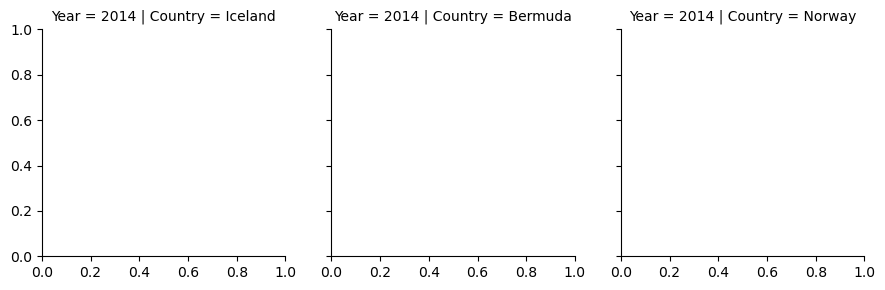

In [56]:
g = sns.FacetGrid(gdp_int_2014, col = 'Country', row = 'Year')

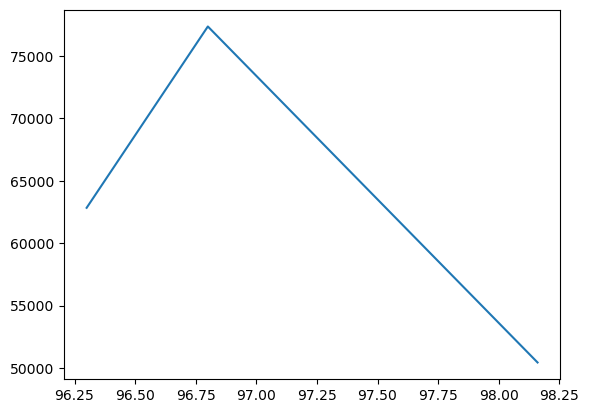

In [57]:
plt.plot(gdp_int_2014['Internet_Users_Pct'], gdp_int_2014['GDP_Per_Capita'])

# answer: what do i notice?

#  Q 22

In [58]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use.Year == 2014]

In [59]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7,Afghanistan,2014,2144.449634,6.39
28,Africa Eastern and Southern,2014,3642.875373,NaN
61,Africa Western and Central,2014,4146.994622,NaN
94,Albania,2014,11586.817446,60.10
127,Algeria,2014,11561.259795,18.09
...,...,...,...,...
7542,West Bank and Gaza,2014,5967.073437,NaN
7571,World,2014,15120.730322,NaN
8716,Yemen,2014,NaN,22.55
7604,Zambia,2014,3375.941270,17.34


# Q 23

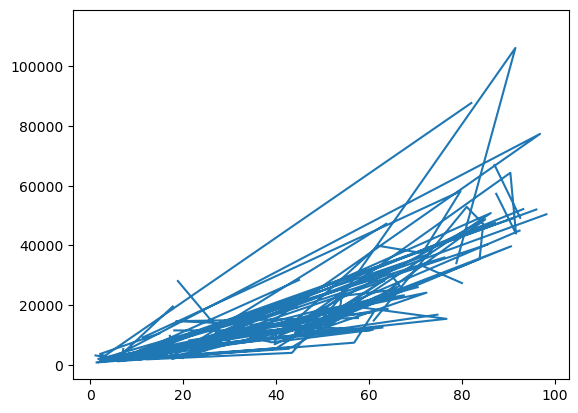

In [60]:
plt.plot(gdp_and_internet_use_2014['Internet_Users_Pct'], gdp_and_internet_use_2014['GDP_Per_Capita'])